<a href="https://colab.research.google.com/github/ZenanAH/Team_Energy/blob/master/London_weather_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load core data sciance  packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from tqdm import tqdm
import datetime

# Allows fatser Compieling INFO HERE -> https://numba.pydata.org/
# import numba 

# Check's versions of packages
import sys
print("Python version:", sys.version)
print("Numpy version:", np.version.version)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
# print("Numba version:", numba.__version__)

Python version: 3.8.12 (default, Sep  5 2022, 11:15:50) 
[Clang 13.1.6 (clang-1316.0.21.2.5)]
Numpy version: 1.19.5
Pandas version: 1.3.5
Seaborn version: 0.11.2


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/data /weather_hourly_darksky.csv')

df = pd.read_csv('../raw_data/weather_hourly_darksky.csv')
df.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [4]:
#Reduce dataframe memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
# #Improve execution speed of your code by adding these decorators:
# @numba.jit
# def f(x):
#     return x
# @numba.njit #The nopython=True option requires that the function be fully compiled (so that the Python interpreter calls are completely removed), otherwise an exception is raised.  These exceptions usually indicate places in the function that need to be modified in order to achieve better-than-Python performance.  We strongly recommend always using nopython=True.
# def f(x):
#     return x

In [6]:
#Check for missing data
total_null = df.isna().sum().sort_values(ascending=False)
percent = 100*(df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
print (missing_data['Total'], missing_data['Percent']) 

# #Generate new features with missing data
# df['feature1_nan'] = df['feature1'].isna()
# df['feature2_nan'] = df['feature2'].isna()
# #Also look for infinite data, recommended to check it also after feature engineering
# df.replace(np.inf,0,inplace=True)
# df.replace(-np.inf,0,inplace=True)

pressure               13
visibility              0
windBearing             0
temperature             0
time                    0
dewPoint                0
apparentTemperature     0
windSpeed               0
precipType              0
icon                    0
humidity                0
summary                 0
Name: Total, dtype: int64 pressure               0.061422
visibility             0.000000
windBearing            0.000000
temperature            0.000000
time                   0.000000
dewPoint               0.000000
apparentTemperature    0.000000
windSpeed              0.000000
precipType             0.000000
icon                   0.000000
humidity               0.000000
summary                0.000000
Name: Percent, dtype: float64


In [7]:
#Check for duplicated data
duplicated_count = df.duplicated().value_counts()
print (duplicated_count)
#df['duplicated'] = df.duplicated() #Create a new feature

False    21165
dtype: int64


In [8]:
# #Fill missing data or drop columns/rows
# df.fillna()
# df.drop('column_full_of_nans')
# df.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visibility           21165 non-null  float64
 1   windBearing          21165 non-null  int64  
 2   temperature          21165 non-null  float64
 3   time                 21165 non-null  object 
 4   dewPoint             21165 non-null  float64
 5   pressure             21152 non-null  float64
 6   apparentTemperature  21165 non-null  float64
 7   windSpeed            21165 non-null  float64
 8   precipType           21165 non-null  object 
 9   icon                 21165 non-null  object 
 10  humidity             21165 non-null  float64
 11  summary              21165 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.9+ MB


(21165, 12)

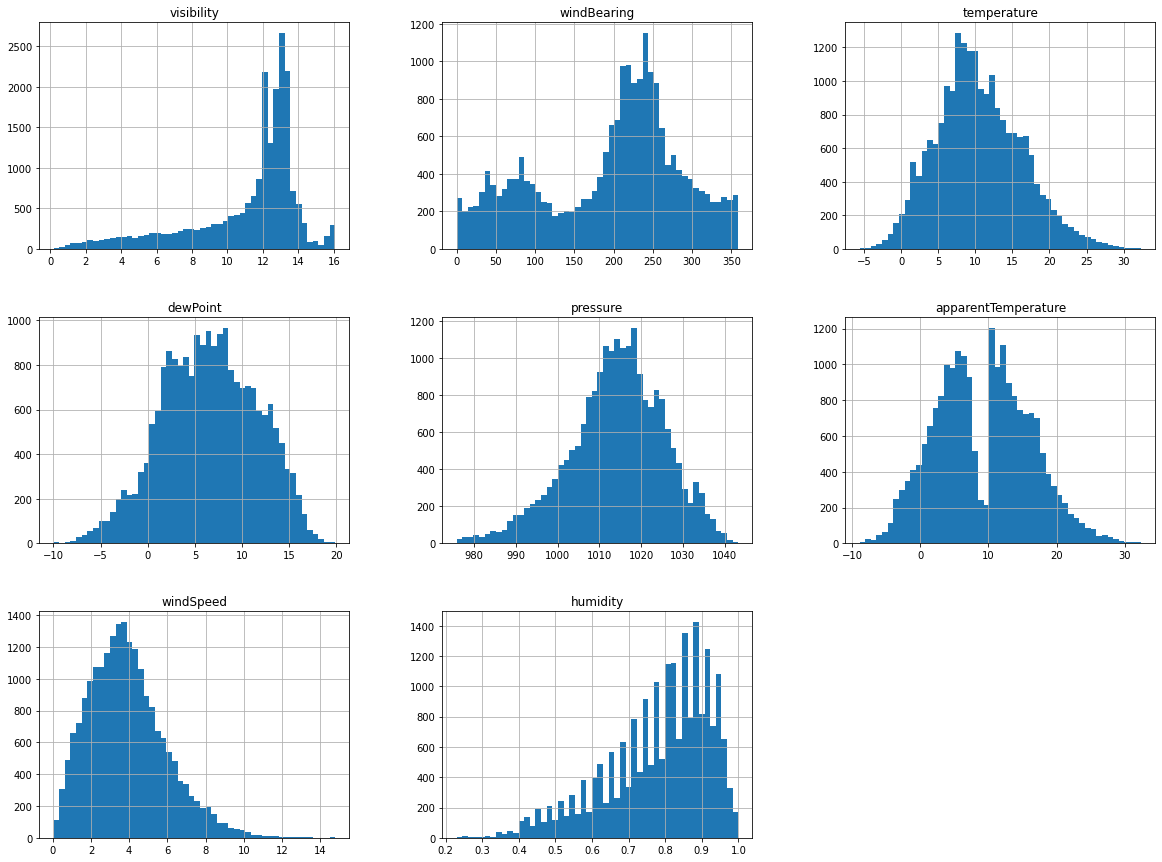

In [9]:
#Visualize data
df.hist(bins=50, figsize=(20,15))
df.head()
df.tail()
df.describe()
df.info()
df.columns
df.shape



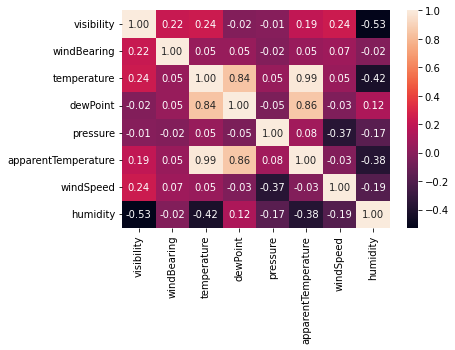

In [10]:
#Correlation analysis
sns.heatmap(df.corr(), annot=True, fmt='.2f')
correlations = df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

In [11]:
# # conver 'data' to datetime format
# df['date'] = pd.to_datetime(df['date']) #convert to datetime format
# df['date'] = df['date'].dt.date #convert to date format
# df.head()


In [12]:
# df_test = df['time'].astype(str) 
# df_test.head()

In [13]:
object_colomns = ['icon','summary','precipType']

In [14]:
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(data=df, columns = object_colomns)

df_encoded

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,humidity,icon_clear-day,...,summary_Foggy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Windy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precipType_rain,precipType_snow
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,0.91,0,...,0,0,0,1,0,0,0,0,1,0
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,0.94,0,...,0,0,0,1,0,0,0,0,1,0
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,0.96,0,...,0,0,0,1,0,0,0,0,1,0
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,0.96,0,...,1,0,0,0,0,0,0,0,1,0
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,1.00,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,0.74,0,...,0,0,0,1,0,0,0,0,1,0
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,0.77,0,...,0,0,0,0,0,0,0,0,1,0
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,0.77,0,...,0,0,0,0,0,0,0,0,1,0
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,0.80,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:

# Add n blank rows
n = 1
new_index = pd.RangeIndex(len(df_encoded)*(n+1))
new_df = pd.DataFrame(np.nan, index=new_index, columns=df_encoded.columns)
ids = np.arange(len(df_encoded))*(n+1)
new_df.loc[ids] = df_encoded.values
print(new_df)
new_df.head()


       visibility  windBearing  temperature                 time  dewPoint  \
0            5.97        104.0        10.24  2011-11-11 00:00:00      8.86   
1             NaN          NaN          NaN                  NaN       NaN   
2            4.88         99.0         9.76  2011-11-11 01:00:00      8.83   
3             NaN          NaN          NaN                  NaN       NaN   
4            3.70         98.0         9.46  2011-11-11 02:00:00      8.79   
...           ...          ...          ...                  ...       ...   
42325         NaN          NaN          NaN                  NaN       NaN   
42326       14.31        248.0         5.96  2014-02-15 22:00:00      2.69   
42327         NaN          NaN          NaN                  NaN       NaN   
42328       14.31        246.0         5.38  2014-02-15 23:00:00      2.60   
42329         NaN          NaN          NaN                  NaN       NaN   

       pressure  apparentTemperature  windSpeed  humidity  icon

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,humidity,icon_clear-day,...,summary_Foggy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Windy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precipType_rain,precipType_snow
0,5.97,104.0,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,0.91,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.88,99.0,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,0.94,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.70,98.0,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,0.96,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# datetimeString = new_df['time'].strftime(format_string)

In [17]:
new_df.columns

Index(['visibility', 'windBearing', 'temperature', 'time', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'humidity',
       'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
       'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind',
       'summary_Breezy', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy',
       'summary_Windy and Mostly Cloudy', 'summary_Windy and Overcast',
       'summary_Windy and Partly Cloudy', 'precipType_rain',
       'precipType_snow'],
      dtype='object')

In [18]:
All_colums_to_impute = ['visibility', 'windBearing', 'temperature', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'humidity',
       'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
       'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind',
       'summary_Breezy', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy',
       'summary_Windy and Mostly Cloudy', 'summary_Windy and Overcast',
       'summary_Windy and Partly Cloudy', 'precipType_rain',
       'precipType_snow']

In [19]:
# # fills with the avrage of the value before and after. 
# new_df[['visibility', 'windBearing', 'temperature', 'dewPoint',
#        'pressure', 'apparentTemperature', 'windSpeed', 'humidity',
#        'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
#        'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind',
#        'summary_Breezy', 'summary_Breezy and Mostly Cloudy',
#        'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
#        'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
#        'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy',
#        'summary_Windy and Mostly Cloudy', 'summary_Windy and Overcast',
#        'summary_Windy and Partly Cloudy', 'precipType_rain',
#        'precipType_snow']]= (new_df[['visibility', 'windBearing', 'temperature', 'dewPoint',
#        'pressure', 'apparentTemperature', 'windSpeed', 'humidity',
#        'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
#        'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind',
#        'summary_Breezy', 'summary_Breezy and Mostly Cloudy',
#        'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
#        'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
#        'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy',
#        'summary_Windy and Mostly Cloudy', 'summary_Windy and Overcast',
#        'summary_Windy and Partly Cloudy', 'precipType_rain',
#        'precipType_snow']].ffill() + new_df[['visibility', 'windBearing', 'temperature', 'dewPoint',
#        'pressure', 'apparentTemperature', 'windSpeed', 'humidity',
#        'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
#        'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind',
#        'summary_Breezy', 'summary_Breezy and Mostly Cloudy',
#        'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
#        'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
#        'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy',
#        'summary_Windy and Mostly Cloudy', 'summary_Windy and Overcast',
#        'summary_Windy and Partly Cloudy', 'precipType_rain',
#        'precipType_snow']].bfill())/2



# fills with the avrage of the value before. 
new_df[['visibility', 'windBearing', 'temperature', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'humidity',
       'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
       'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind',
       'summary_Breezy', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy',
       'summary_Windy and Mostly Cloudy', 'summary_Windy and Overcast',
       'summary_Windy and Partly Cloudy', 'precipType_rain',
       'precipType_snow']]= (new_df[['visibility', 'windBearing', 'temperature', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'humidity',
       'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
       'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind',
       'summary_Breezy', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy',
       'summary_Windy and Mostly Cloudy', 'summary_Windy and Overcast',
       'summary_Windy and Partly Cloudy', 'precipType_rain',
       'precipType_snow']].ffill())

print (new_df)

       visibility  windBearing  temperature                 time  dewPoint  \
0            5.97        104.0        10.24  2011-11-11 00:00:00      8.86   
1            5.97        104.0        10.24                  NaN      8.86   
2            4.88         99.0         9.76  2011-11-11 01:00:00      8.83   
3            4.88         99.0         9.76                  NaN      8.83   
4            3.70         98.0         9.46  2011-11-11 02:00:00      8.79   
...           ...          ...          ...                  ...       ...   
42325       14.31        248.0         6.47                  NaN      2.71   
42326       14.31        248.0         5.96  2014-02-15 22:00:00      2.69   
42327       14.31        248.0         5.96                  NaN      2.69   
42328       14.31        246.0         5.38  2014-02-15 23:00:00      2.60   
42329       14.31        246.0         5.38                  NaN      2.60   

       pressure  apparentTemperature  windSpeed  humidity  icon

In [20]:
new_df['time'].dtypes

dtype('O')

In [21]:
pd.to_datetime(new_df['time'])

0       2011-11-11 00:00:00
1                       NaT
2       2011-11-11 01:00:00
3                       NaT
4       2011-11-11 02:00:00
                ...        
42325                   NaT
42326   2014-02-15 22:00:00
42327                   NaT
42328   2014-02-15 23:00:00
42329                   NaT
Name: time, Length: 42330, dtype: datetime64[ns]

In [25]:
min_time = df.loc[0, 'time']
new_df['time'] = pd.date_range(min_time, freq='30 min', periods=len(df)*2)

In [26]:
new_df['time'] = new_df['time'].fillna(new_df['time'].shift() + pd.Timedelta('30 min'))
new_df.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,humidity,icon_clear-day,...,summary_Foggy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Windy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precipType_rain,precipType_snow
0,5.97,104.0,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,0.91,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.97,104.0,10.24,2011-11-11 00:30:00,8.86,1016.76,10.24,2.77,0.91,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.88,99.0,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,0.94,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.88,99.0,9.76,2011-11-11 01:30:00,8.83,1016.63,8.24,2.95,0.94,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.70,98.0,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,0.96,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
new_df.describe()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity,icon_clear-day,icon_clear-night,...,summary_Foggy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Windy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precipType_rain,precipType_snow
count,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,...,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000,42330.000000
mean,11.166485,195.685897,10.471486,6.530501,1014.123268,9.230338,3.905215,0.781829,0.052445,0.220222,...,0.032743,0.287975,0.046256,0.313631,0.000850,0.001370,0.000425,0.000142,0.962438,0.037562
std,3.099300,90.628383,5.781836,5.041906,11.387740,6.940837,2.026830,0.140367,0.222925,0.414401,...,0.177965,0.452825,0.210041,0.463974,0.029151,0.036991,0.020617,0.011905,0.190137,0.190137
min,0.180000,0.000000,-5.640000,-9.980000,975.740000,-8.880000,0.040000,0.230000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.120000,121.000000,6.470000,2.820000,1007.430000,3.900000,2.420000,0.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12.260000,217.000000,9.930000,6.570000,1014.780000,9.360000,3.680000,0.810000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,13.080000,256.000000,14.310000,10.330000,1022.050000,14.320000,5.070000,0.890000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,16.090000,359.000000,32.400000,19.880000,1043.320000,32.420000,14.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
new_df.rename(columns={'time':'DateTime'},inplace=True)

In [28]:
new_df['DateTime'].dtypes

dtype('<M8[ns]')

In [29]:
new_df.head()

,visibility,windBearing,temperature,DateTime,dewPoint,pressure,apparentTemperature,windSpeed,humidity,icon_clear-day,...,summary_Foggy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Windy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precipType_rain,precipType_snow
0,5.97,104.0,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,0.91,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.97,104.0,10.24,2011-11-11 00:30:00,8.86,1016.76,10.24,2.77,0.91,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.88,99.0,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,0.94,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.88,99.0,9.76,2011-11-11 01:30:00,8.83,1016.63,8.24,2.95,0.94,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.70,98.0,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,0.96,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
# exsport csv file

# new_df.to_csv('../raw_data/cleaned_weather_hourly_darksky.csv', index=False)
new_df.to_csv('/Users/jordanharris/code/ZananAH/Team_Energy/raw_data/cleaned_weather_hourly_darksky.csv', index=False)

# exsport csv file to Google Cloud 
# new_df.to_csv('/content/drive/MyDrive/data /cleaned_weather_hourly_darksky.csv', index=False)